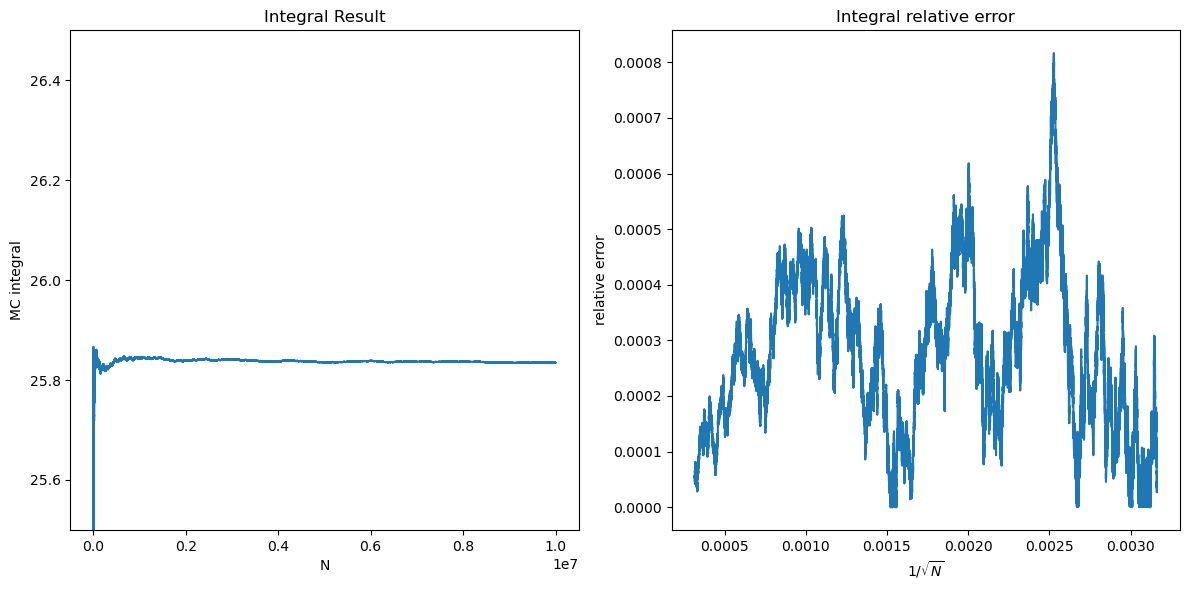

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng()


def integrand(xdata: np.ndarray) -> np.ndarray:
    """The integrand function

    input:
        xdata: 10 x N array

    output:
        1 x N array
    """
    return np.sum(xdata, axis=0) ** 2


def MCIntegrate(f: callable, N: int) -> list[np.ndarray, np.ndarray]:
    """Monte Carlo integration

    inputs:
        f: function to integrate -- integrand
        n: number of dimensions
        N: number of samples
    """
    sum = f(rng.random((10, N)))  # 1 x N
    sum = np.cumsum(sum)  # 1 x N
    res = sum / np.arange(1, N + 1)  # 1 x N
    relativeError = np.abs(res - 155 / 6) / (155 / 6)  # 1 x N

    return res, relativeError


N = int(1e7)
Nlist = np.arange(1, N + 1)
res, relativeError = MCIntegrate(integrand, N)


# plot
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))

# ax1
ax1.set_title("Integral Result")
ax1.set_xlabel("N")
ax1.set_ylabel("MC integral")
ax1.set_ylim(25.5, 26.5)
ax1.plot(Nlist, res)

# ax2
ax2.set_title("Integral relative error")
ax2.set_xlabel(r"$1/\sqrt{N}$")
ax2.set_ylabel("relative error")
ax2.plot(1 / np.sqrt(Nlist)[100000:-1], relativeError[100000:-1])

plt.tight_layout()
plt.show()